# Acceptance-Rejection Sampling

Acceptance-Rejection Sampling is a technique to generate observations from a certain distribution with p.d.f. $f(x)$ which satisfies:

$$f(x) \leq \frac{g(x)}{\alpha}$$

where $g(x)$ is the p.d.f. of a proposal distribution for which we know how to sample from and $M$ is a finite bound on the likelihood ratio of the two p.d.f.'s. chosen as:

$$M = \sup_x \frac{f(x)}{g(x)}$$

The intuition behind Rejection Sampling is simple:
- Sample a point on the x-axis from a proposal distribution with p.d.f. $g(x)$ that we know how to sample from and which is higher than $f(x)$ at every point.
- Draw a vertical line at this x-position, up to the maximum value $g(x)$ of the proposal distribution.
- Sample uniformly along this line from 0 to the maximum of the probability density function. If the sampled value is greater than the value of the desired distribution at this vertical line, reject the x-value and return to step 1; else the x-value is a sample from the desired distribution.

In practice the algorithm works as follows:
1. Draw $Y$ from $g(x)$ and $U$ from a $Uniform(0,1)$.
2. If $U \leq \frac{f(x)}{M \cdot g(x)}$, accept the draw and set $X = Y$.
3. Else, reject the draw.

### Example: Sampling from the half positive Standard Normal distribution

Let's apply the this technique to sample from the half positive Standard Normal with p.d.f.

$$f(x) = \sqrt{\frac{2}{\pi}} \cdot exp(\frac{-x^2}{2})$$

We will take $g(x)$ equal to an Exponential distribution with $\lambda = 1$ as a proposal distribution

$$g(x) = e^{-x}$$

and we set

$$M = \sqrt{\frac{2e}{\pi}}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

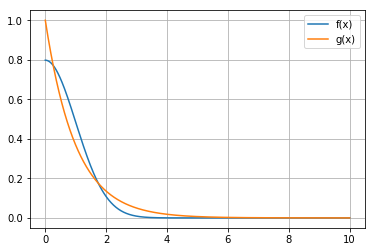

In [25]:
def f(x):
    return np.sqrt(2/np.pi) * np.exp(-x**2/2)

def g(x):
    return np.exp(-x)

x = np.linspace(0,10,1000)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, g(x), label='g(x)')
plt.grid()
plt.legend()

For $g(x)$ to be a good proposal function we have to multiply it by $M$.

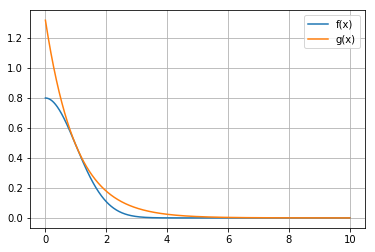

In [26]:
M = np.sqrt(2 * np.e / np.pi)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, M*g(x), label='g(x)')
plt.grid()
plt.legend()

Now we have a perfect envelope and we are ready to start sampling from the half positive Standard Normal.

First we draw a sample from an Exponential distribution.

In [50]:
def sample(n):
    Y = np.random.exponential(size=n)
    X = []
    
    for y in Y:
        if np.random.rand() <= np.exp(-0.5*(y - 1)**2):      # We simplify f(x)/M*g(x)
            X.append(y)
    
    return X

Let's analyze the results for different values of n

In [1]:
X = sample(1000)
plt.title('n = 1000')
plt.hist(X, bins=100);

NameError: name 'sample' is not defined

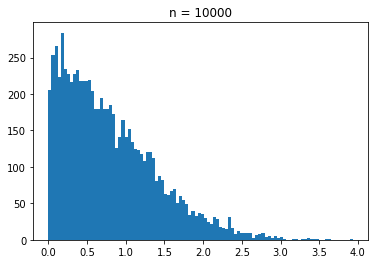

In [52]:
X = sample(10000)
plt.title('n = 10000')
plt.hist(X, bins=100);

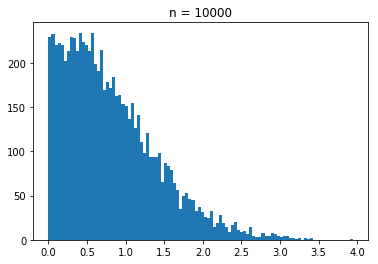

In [53]:
X = sample(10000)
plt.title('n = 10000')
plt.hist(X, bins=100);

As we can see from the histograms, the sample increasingly resembles a half positive Standard Normal as n increases. In fact, Rejection Sampling is a perfect sampling algorithm, therefore we are sure that the sample obtained comes from the target distribution $f(x)$.

### References

- Notes on Computational Statistics, Rebecca Graziani
- https://en.wikipedia.org/wiki/Rejection_sampling